# Clean & Explore for Data A (Part 2)

Cleaning and Exploring Data A

# Goal

Goal of the notebook is to cleaning text for A and explore the context.

Goal of A : siswa memberikan jawaban yang mengindikasikan beberapa hal yang bisa dilakukan ketika seseorang berpindah lokasi karena permasalahan dalam pertanyaan. Kemudian dapat menjelaskan tantangan berupa poin mengenai komunikasi, finansial, ekonomi dan sosial dalam kehidupan yang baru karena perpindahan.  


# Plan

Checklist what will be done on the notebook :

    [*] Get Data A
    [*] Skimming
    [ ] Data Preparation
    [ ] Explore it

# Summary

Summary result of the notebook


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize

import gensim

In [2]:
RAW_PATH="../data/raw/"
INTERIM_PATH="../data/interim/"
PROCESSED_PATH="../data/processed/"
MODEL_PATH="../models/"
SRC_PATH='../src/'

In [3]:
stoplist=open(SRC_PATH+'stopwords_id.txt').read().split('\n')+['nya','yg','yng']

In [4]:
def clean_word(s):
    try:
        s0=re.sub(r'[^\w\s]',' ',s)
        s0=re.sub("\d+",' ',s0)
        s0=word_tokenize(s0.lower())
        #s1=[w for w in s0 if w not in stoplist]
        s1=' '.join(s1)
    except:
        s1=''
    return s1

## Get Data

In [5]:
data_raw=pd.read_csv(RAW_PATH+'data_train_A.csv')

## Skimming

In [6]:
data_raw.head()

,RES_ID,RESPONSE,LABEL
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0
3,TRA4,mereka akan sulit beradaptasi,1
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1


In [7]:
data_raw.shape

(268, 3)

In [8]:
data_raw.LABEL.mean()

0.7126865671641791

In [9]:
data_raw.RESPONSE

0      intetraksi/beradaptasi terhadap lingkungan yan...
1             seperti jatuhnya meteor tsunami gempa bumi
2          hanya tuhan yang tahu tantangan nya itu apaan
3                          mereka akan sulit beradaptasi
4                 Tempat tinggal, ekonomi, dan pekerjaan
5      akan terganggu dengan kesehatanya karena merek...
6      Mereka tidak akan di hormati oleh orang layakn...
7                mereka akan kehilangan lahan pertanian.
8      Pada kasus-kasus seperti salah satunya yang te...
9                        mendapat musibah dan melawannya
10               karena mereka butuh tempat tinggal baru
11     Akan kehilangan tempat tinggal yang lama atau ...
12                mereka akan pindah ke tempat yang dulu
13                                           beradaptasi
14     Pengungsi iklim ini orang-orang yang terpaksa ...
15     karna mereka tidak mau terkena iklim yang sang...
16     keadaan yg tidak memadai serta kurangnya fasil...
17     Pengungsi iklim adalah o

In [10]:
len('fkjgrioejtklejtdfljlkgr')

23

## LDA to catch Stimulus Words

## Data Preparation

In [14]:
data_raw[['RESPONSE_CLN','LABEL']].sample(10).values

array([['orang orang meninggalkan komunitas negaranya bencana lingkungan',
        0],
       ['penderitaan panas cuaca iklim', 0],
       ['menahan suhu tubuh iklim negara', 1],
       ['bencana alam', 0],
       ['negara bagus aman', 0],
       ['kenaikan permukaan air laut', 0],
       ['tantangan dihadapi pengungsi iklim beradaptasi lingkungan barunya berbeda tinggal mencari lahan pekerjaan',
        1],
       ['suilt beradaptasi nyaman', 1],
       ['pengungsi iklim', 0],
       ['kehilangan lingkungan akibat bencana', 0]], dtype=object)

In [11]:
def avg_word_len(s):
    len_list=np.array([len(k) for k in s.split(' ')])
    return len_list.mean()

In [12]:
def data_raw_features_engA(data_raw):
    stimulus_word=['berpindah','tantangan','komunikasi','ekonomi','sosial','adaptasi','pindah','suasana','baru','sulit']
    
    ## Number of the words
    data_raw['RESPONSE_CLN']=data_raw.RESPONSE.apply(clean_word)
    data_raw['count_word']=data_raw.RESPONSE.apply(lambda x : len(x.split(' ')))
    data_raw['count_stopword']
    data_raw['count_non_stopword']
    data_raw['count_stimulus']
    data_raw['count_non_stimulus'] 

    ## Average word length
    data_raw['avg_word_length']=data_raw.RESPONSE.apply(avg_word_len)
    data_raw['avg_word_length_cln']=data_raw.RESPONSE_CLN.apply(avg_word_len)
    
    data_raw2=data_raw.copy()
    for w in stimulus_word:
        data_raw2['is_'+w]=data_raw2.RESPONSE_CLN.apply(lambda x: int(w in x))

In [17]:
## Check Variance every 'is'-columns
data_raw2[[i for i in data_raw2.columns if 'is' in i]].std()

is_berpindah     0.135563
is_tantangan     0.315883
is_komunikasi    0.061085
is_ekonomi       0.121481
is_sosial        0.105405
is_adaptasi      0.440107
is_pindah        0.286073
is_suasana       0.105405
is_baru          0.207199
is_sulit         0.280623
dtype: float64

## Exploratory Data Analytics

In [18]:
data_raw2.sample(5)

,RES_ID,RESPONSE,LABEL,RESPONSE_CLN,count_word,count_word_cln,avg_word_length,avg_word_length_cln,is_berpindah,is_tantangan,is_komunikasi,is_ekonomi,is_sosial,is_adaptasi,is_pindah,is_suasana,is_baru,is_sulit
217,TRA218,pertimbangan proyek,0,pertimbangan proyek,2,2,9.000000,9.0,0,0,0,0,0,0,0,0,0,0
147,TRA148,Perekonomian yang menurun dan mereka harus mem...,1,perekonomian menurun membangun kehidupan melan...,13,6,7.076923,10.0,0,0,0,1,0,0,0,0,0,0
6,TRA7,Mereka tidak akan di hormati oleh orang layakn...,0,hormati orang layaknya hormati tinggal,18,5,5.000000,6.8,0,0,0,0,0,0,0,0,0,0
225,TRA226,negara munggin menjari donasi hidup baru,0,negara munggin menjari donasi hidup,6,5,5.833333,6.2,0,0,0,0,0,0,0,0,0,0
189,TRA190,sulit bersosialisasi dengan keadaan iklim yang...,1,sulit bersosialisasi iklim,11,3,5.454545,8.0,0,0,0,0,1,0,0,0,0,1


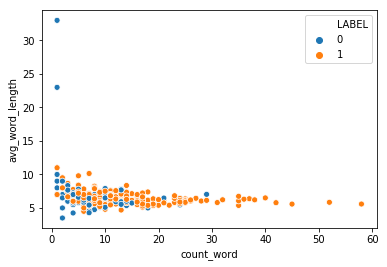

In [19]:
## Explore
sns.scatterplot(x='count_word',y='avg_word_length',hue='LABEL',data=data_raw2)

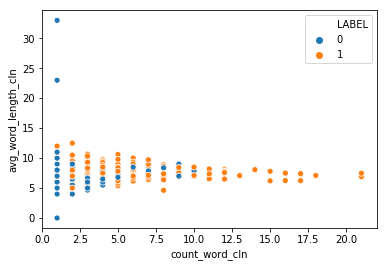

In [20]:
## Explore
sns.scatterplot(x='count_word_cln',y='avg_word_length_cln',hue='LABEL',data=data_raw2)

In [21]:
data_raw2.count_word_cln.describe()

count    268.000000
mean       5.335821
std        3.892649
min        1.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       21.000000
Name: count_word_cln, dtype: float64

In [22]:
data_raw2[[i for i in data_raw2.columns if 'is' in i]+['LABEL']].corr()['LABEL']

is_berpindah    -0.034336
is_tantangan     0.094659
is_komunikasi    0.038857
is_ekonomi       0.078155
is_sosial        0.067556
is_adaptasi      0.377524
is_pindah        0.083618
is_suasana      -0.167575
is_baru          0.137467
is_sulit         0.165101
LABEL            1.000000
Name: LABEL, dtype: float64

In [23]:
a=[1,2,3,4,5]
a[:5]

[1, 2, 3, 4, 5]

In [24]:
def padding_words(word_list,n):
    word_out=['0']*n
    word_list0=word_list.copy()
    if len(word_list)>n:
        word_list0=word_list[:n]
    word_out[:len(word_list0)] = word_list0
    return word_out

In [25]:
MAX_PADDING=10
data_raw2['RESPOND_USED']=data_raw2.RESPONSE_CLN.apply(lambda x : ' '.join(padding_words(x.split(' '),MAX_PADDING)))

## Embedding Training

In [26]:
# corpus=data_raw2.RESPONSE_CLN.tolist()
corpus=data_raw2.RESPONSE_CLN.tolist()
words=[doc.split(' ') for doc in corpus]

In [27]:
EMBED_SIZE=80
model_vec = gensim.models.Word2Vec(
        words,
        size=EMBED_SIZE,
        window=3,
        min_count=3)

In [28]:
# model_vec.wv.most_similar('nyaman')

## Save Embbed and Data

In [29]:
data_raw2.head()

,RES_ID,RESPONSE,LABEL,RESPONSE_CLN,count_word,count_word_cln,avg_word_length,avg_word_length_cln,is_berpindah,is_tantangan,is_komunikasi,is_ekonomi,is_sosial,is_adaptasi,is_pindah,is_suasana,is_baru,is_sulit,RESPOND_USED
0,TRA1,intetraksi/beradaptasi terhadap lingkungan yan...,1,intetraksi beradaptasi lingkungan,5,3,9.800000,10.333333,0,0,0,0,0,1,0,0,0,0,intetraksi beradaptasi lingkungan 0 0 0 0 0 0 0
1,TRA2,seperti jatuhnya meteor tsunami gempa bumi,0,jatuhnya meteor tsunami gempa bumi,6,5,6.166667,6.000000,0,0,0,0,0,0,0,0,0,0,jatuhnya meteor tsunami gempa bumi 0 0 0 0 0
2,TRA3,hanya tuhan yang tahu tantangan nya itu apaan,0,tuhan tantangan,8,2,4.750000,7.000000,0,1,0,0,0,0,0,0,0,0,tuhan tantangan 0 0 0 0 0 0 0 0
3,TRA4,mereka akan sulit beradaptasi,1,sulit beradaptasi,4,2,6.500000,8.000000,0,0,0,0,0,1,0,0,0,1,sulit beradaptasi 0 0 0 0 0 0 0 0
4,TRA5,"Tempat tinggal, ekonomi, dan pekerjaan",1,tinggal ekonomi pekerjaan,5,3,6.800000,7.666667,0,0,0,1,0,0,0,0,0,0,tinggal ekonomi pekerjaan 0 0 0 0 0 0 0


In [30]:
model_vec.wv.save(MODEL_PATH+"embedding_A.wv")
# wv = KeyedVectors.load("model.wv", mmap='r')

In [31]:
data_raw2.to_csv(PROCESSED_PATH+'20190902_data_clean_A.csv',index=False)

In [32]:
model_vec.wv.vocab['adaptasi'].count

7

## Conclusions